<a href="https://colab.research.google.com/github/JohnAntonusMaximus/tensorflow-serving/blob/master/Image_Classification_API_Using_TensorFlow_Serving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Serving For Production



## Download and Install All Dependencies

In [1]:
!echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -

deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  21962      0 --:--:-- --:--:-- --:--:-- 21962
OK


In [35]:
!echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && \
!curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -

deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
/bin/bash: !curl: command not found
gpg: no valid OpenPGP data found.


In [36]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 151 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 1.14.0 [151 MB]
Fetched 151 MB in 2s (84.5 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 131289 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_1.14.0_all.deb ...
Unpacking tensorflow-model-server (1.14.0) ...
Setting up tensorflow-model-server (1.14.0) ...


In [4]:
!pip install tensorflow-gpu==1.13.1

     |████████████████████████████████| 345.2MB 48kB/s 
     |████████████████████████████████| 3.2MB 35.0MB/s 
     |████████████████████████████████| 368kB 51.7MB/s 
ERROR: tensorflow 1.14.0 has requirement tensorboard<1.15.0,>=1.14.0, but you'll have tensorboard 1.13.1 which is incompatible.
ERROR: tensorflow 1.14.0 has requirement tensorflow-estimator<1.15.0rc0,>=1.14.0rc0, but you'll have tensorflow-estimator 1.13.0 which is incompatible.
  Found existing installation: tensorboard 1.14.0
    Uninstalling tensorboard-1.14.0:
      Successfully uninstalled tensorboard-1.14.0
  Found existing installation: tensorflow-estimator 1.14.0
    Uninstalling tensorflow-estimator-1.14.0:
      Successfully uninstalled tensorflow-estimator-1.14.0


In [61]:
import os
import json
import random
import requests
import subprocess
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline

tf.__version__

'1.13.1'

## Dataset Proprocessing

#### Load the dataset

In [7]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#### Image normalization

In [0]:
X_train = X_train / 255.0
X_test = X_test / 255.0

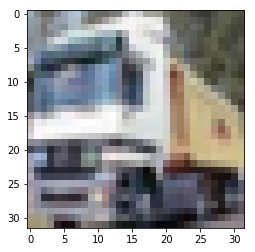

In [9]:
plt.imshow(X_train[1])

## Define The Model

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(0.0001),metrics=['sparse_categorical_accuracy'])

#### Train the model

In [17]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 9s 185us/sample - loss: 0.8756 - sparse_categorical_accuracy: 0.6952
Epoch 2/10
50000/50000 [==============================] - 9s 187us/sample - loss: 0.8150 - sparse_categorical_accuracy: 0.7178
Epoch 3/10
50000/50000 [==============================] - 9s 184us/sample - loss: 0.7637 - sparse_categorical_accuracy: 0.7358
Epoch 4/10
50000/50000 [==============================] - 9s 181us/sample - loss: 0.7185 - sparse_categorical_accuracy: 0.7522
Epoch 5/10
50000/50000 [==============================] - 9s 186us/sample - loss: 0.6692 - sparse_categorical_accuracy: 0.7687
Epoch 6/10
50000/50000 [==============================] - 9s 182us/sample - loss: 0.6276 - sparse_categorical_accuracy: 0.7841
Epoch 7/10
50000/50000 [==============================] - 9s 181us/sample - loss: 0.5856 - sparse_categorical_accuracy: 0.7974
Epoch 8/10
50000/50000 [==============================] - 9s 183us/sample - loss: 0.5460 - sparse_categorical_a

In [18]:
test_loss, test_accuracy = model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 106us/sample - loss: 0.9030 - sparse_categorical_accuracy: 0.7107


In [19]:
print("Test Accuracy: {}".format(test_accuracy))

Test Accuracy: 0.7106999754905701


## Prepare Model For Serving

In [0]:
MODEL_DIR = "model/"
version = 1

In [0]:
export_path = os.path.join(MODEL_DIR,str(version))

In [0]:
if os.path.isdir(export_path):
  !rm -r {export_path}

#### Save the model

In [48]:
tf.saved_model.simple_save(
    tf.keras.backend.get_session(),
    export_path,
    inputs={"input_image": model.input},
    outputs={t.name:t for t in model.outputs}    
)

INFO:tensorflow:Assets added to graph.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: model/1/saved_model.pb


## Set Up Production Environment

#### Run the Tensorflow Serving Rest API

In [0]:
os.environ['MODEL_DIR'] = os.path.abspath(MODEL_DIR)

#### Exporting the model directory to environment variables

In [53]:
%%bash --bg
nohup tensorflow_model_server --rest_api_port=8408 --model_name=image_net --model_base_path=${MODEL_DIR} > server.log 2>&1

Starting job # 7 in a separate thread.


In [59]:
!tail server.log

2019-08-07 01:08:46.084409: I external/org_tensorflow/tensorflow/cc/saved_model/reader.cc:31] Reading SavedModel from: /content/model/1
2019-08-07 01:08:46.090781: I external/org_tensorflow/tensorflow/cc/saved_model/reader.cc:54] Reading meta graph with tags { serve }
2019-08-07 01:08:46.097399: I external/org_tensorflow/tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-08-07 01:08:46.124800: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:202] Restoring SavedModel bundle.
2019-08-07 01:08:46.188311: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:311] SavedModel load for tags { serve }; Status: success. Took 103888 microseconds.
2019-08-07 01:08:46.188371: I tensorflow_serving/servables/tensorflow/saved_model_warmup.cc:103] No warmup data file found at /content/model/1/assets.extra/tf_serving_warmup_requests
2019-08-07 01:08:46.188463: I tensorflow_serving/cor

## Create a Post Request

In [69]:
random_image = np.random.randint(0,len(X_test))
random_image

7515

#### Create the JSON Object

In [70]:
data = json.dumps({"signature_name": "serving_default", "instances": [X_test[random_image].tolist()]})
data

'{"signature_name": "serving_default", "instances": [[[[0.5882352941176471, 0.6705882352941176, 0.6352941176470588], [0.6274509803921569, 0.6941176470588235, 0.6666666666666666], [0.6313725490196078, 0.6784313725490196, 0.6588235294117647], [0.6039215686274509, 0.6431372549019608, 0.6235294117647059], [0.6039215686274509, 0.6431372549019608, 0.6235294117647059], [0.5490196078431373, 0.6039215686274509, 0.5803921568627451], [0.5647058823529412, 0.6274509803921569, 0.6], [0.5098039215686274, 0.5607843137254902, 0.5294117647058824], [0.4666666666666667, 0.5098039215686274, 0.4745098039215686], [0.4392156862745098, 0.47058823529411764, 0.4392156862745098], [0.5019607843137255, 0.5254901960784314, 0.49019607843137253], [0.6862745098039216, 0.7019607843137254, 0.6627450980392157], [0.7725490196078432, 0.7843137254901961, 0.7411764705882353], [0.807843137254902, 0.8196078431372549, 0.7725490196078432], [0.6549019607843137, 0.6705882352941176, 0.6196078431372549], [0.611764705882353, 0.6352941

#### Send the POST Request to the model

In [0]:
headers = {"content-type": "application/json"}
json_response = requests.post(url="http://localhost:8408/v1/models/image_net:predict", data=data,headers=headers)

In [72]:
json_response

<Response [200]>

In [0]:
predictions = json.loads(json_response.text)['predictions']

In [74]:
predictions

[[0.00281521142,
  0.0126240812,
  0.00708361948,
  0.000129451742,
  0.000114753973,
  0.000449644751,
  0.000106711006,
  2.67076357e-05,
  0.93482697,
  0.0418229]]

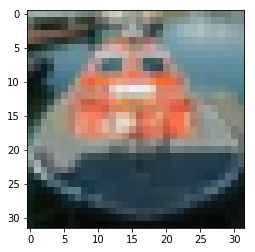

In [75]:
plt.imshow(X_test[random_image])

In [76]:
class_names[np.argmax(predictions)]

'ship'

## Send the POST Request to a Specific Serving Model

In [0]:
specific_model_json_response = requests.post(url="http://localhost:8408/v1/models/image_net/versions/1:predict", data=data,headers=headers)

In [87]:
specific_model_json_response

<Response [400]>

In [89]:
predictions = json.loads(specific_model_json_response.text)['predictions']
predictions

[[0.00281521142,
  0.0126240812,
  0.00708361948,
  0.000129451742,
  0.000114753973,
  0.000449644751,
  0.000106711006,
  2.67076357e-05,
  0.93482697,
  0.0418229]]

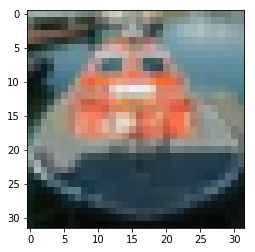

In [90]:
plt.imshow(X_test[random_image])

In [93]:
class_names[np.argmax(predictions)]

'ship'